In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
df = pd.read_csv('datasets/daily_houston_data.csv').dropna()

<AxesSubplot:>

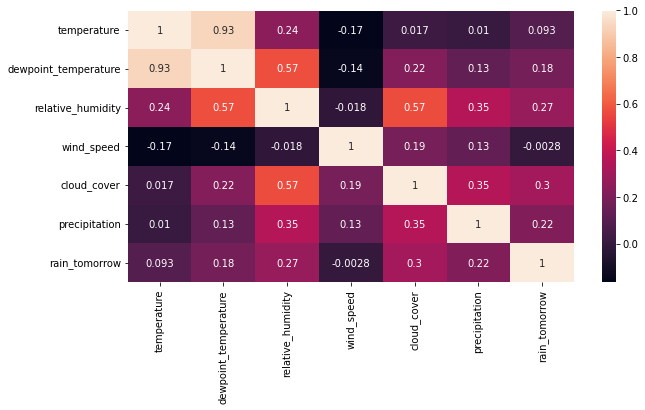

In [38]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True) #generate heatmap, show data value in each cell 

In [39]:
df.rain_tomorrow.value_counts()

0    5049
1    1525
Name: rain_tomorrow, dtype: int64

In [40]:
resampler =  RandomOverSampler(sampling_strategy='minority', random_state=42)

In [41]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [68]:
input_cols = [
                'temperature',
                'dewpoint_temperature',
                'relative_humidity',
                'cloud_cover',  
                'wind_speed'
]

In [69]:
x_train = train[input_cols]
y_train = train[['precipitation']]

In [70]:
x_test = test[input_cols]
y_test = test[['precipitation']]

In [71]:
model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression()

In [72]:
model.predict(x_test)

array([[ 7.47954129],
       [ 1.43969836],
       [-5.28854661],
       ...,
       [ 6.65992734],
       [-0.11946885],
       [ 4.26939799]])

In [73]:
print('Score: {:.2f}'.format(model.score(x_train,y_train)*100))

Score: 19.49


In [74]:
print('Score: {:.2f}'.format(model.score(x_test,y_test)*100))

Score: 18.66


In [75]:
coefficients = (model.coef_).tolist()[0]

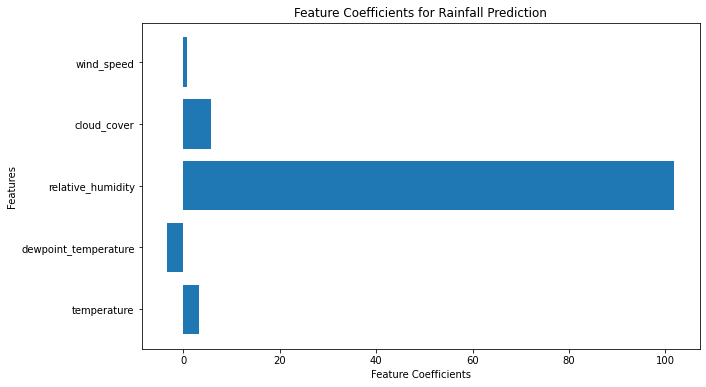

In [79]:
plt.figure(figsize=(10,6))
plt.barh(input_cols, coefficients)
plt.title("Feature Coefficients for Rainfall Prediction")
plt.ylabel("Features")
plt.xlabel("Feature Coefficients")
plt.show()

<AxesSubplot:title={'center':'Relative Humidity vs Precipitation'}, xlabel='relative_humidity', ylabel='precipitation'>

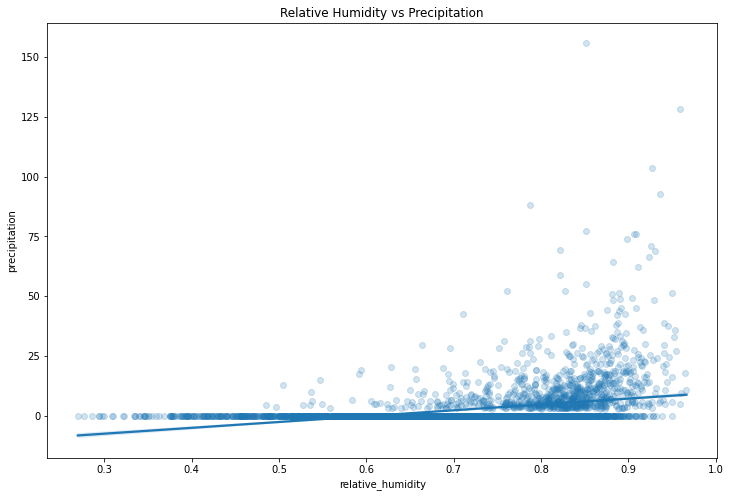

In [83]:
plt.figure(figsize=(12,8))
plt.title("Relative Humidity vs Precipitation")
sns.regplot(x=x_train.relative_humidity, y=y_train.precipitation, scatter_kws={'alpha':0.2})